In [2]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

ModuleNotFoundError: No module named 'tensorflow'

In [45]:
import pandas as pd
df = pd.read_json("/content/Sarcasm_Headlines_Dataset.json", lines=True)
print(df.head())

   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...  


In [46]:
df.drop("article_link",axis = 1)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
...,...,...
28614,1,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...


In [47]:
training_size = 20000
# splitting data for training and testing
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [48]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [49]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [50]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - 6ms/step - accuracy: 0.5643 - loss: 0.6804 - val_accuracy: 0.7809 - val_loss: 0.6615
Epoch 2/30
625/625 - 2s - 4ms/step - accuracy: 0.7278 - loss: 0.5505 - val_accuracy: 0.7608 - val_loss: 0.4727
Epoch 3/30
625/625 - 4s - 6ms/step - accuracy: 0.8228 - loss: 0.4028 - val_accuracy: 0.8284 - val_loss: 0.3972
Epoch 4/30
625/625 - 2s - 3ms/step - accuracy: 0.8511 - loss: 0.3468 - val_accuracy: 0.8272 - val_loss: 0.3825
Epoch 5/30
625/625 - 3s - 4ms/step - accuracy: 0.8717 - loss: 0.3085 - val_accuracy: 0.8165 - val_loss: 0.3934
Epoch 6/30
625/625 - 2s - 4ms/step - accuracy: 0.8845 - loss: 0.2817 - val_accuracy: 0.8477 - val_loss: 0.3521
Epoch 7/30
625/625 - 3s - 4ms/step - accuracy: 0.8939 - loss: 0.2588 - val_accuracy: 0.8323 - val_loss: 0.3738
Epoch 8/30
625/625 - 4s - 6ms/step - accuracy: 0.8960 - loss: 0.2474 - val_accuracy: 0.7330 - val_loss: 0.6890
Epoch 9/30
625/625 - 2s - 3ms/step - accuracy: 0.9096 - loss: 0.2216 - val_accuracy: 0.8505 - val_loss: 0.3577
E

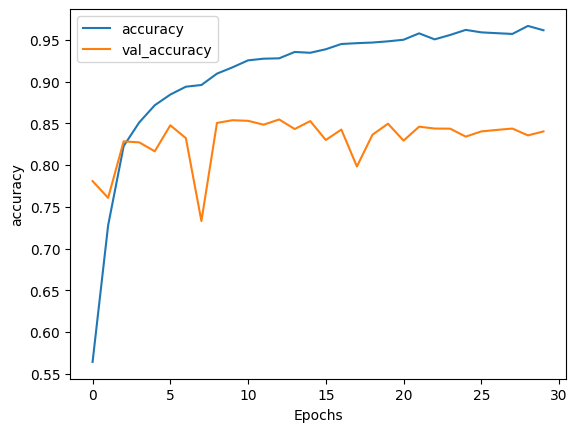

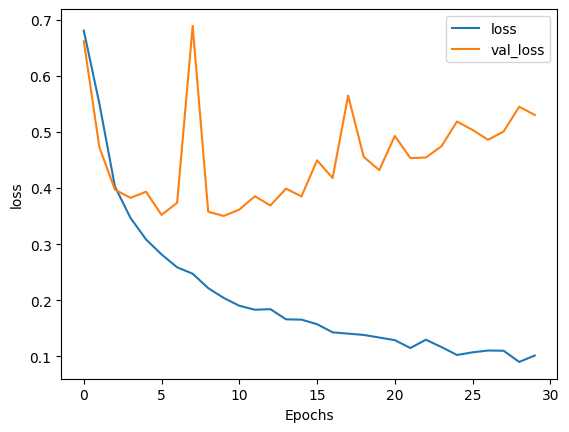

In [56]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [57]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [58]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [59]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [60]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
sentence = []
num = int(input("no of sentences to evaluate :"))
for i in range(num):
  line = input("Please enter the sentences to be judged for sarcasm :")
  sentence.append(line)

no of sentences to evaluate :5
Please enter the sentences to be judged for sarcasm :granny starting to fear spiders in the garden might be real
Please enter the sentences to be judged for sarcasm :lets go for dinner to a restaurant tonight
Please enter the sentences to be judged for sarcasm :work with hands not your mouth
Please enter the sentences to be judged for sarcasm :can't be rolling stones when you live in a glass house
Please enter the sentences to be judged for sarcasm :we congratulated him on graduating


In [82]:
# sample sentences below to test if u dont wanna give input manually just un-comment the below line
sentence = ["granny starting to fear spiders in the garden might be real", "lets have a cupcake", "work with hands not your mouth"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
# print(model.predict(padded))

df1 = pd.DataFrame()
df1['sentences'] = sentence
df1['predictions'] = model.predict(padded)
df1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


,sentences,predictions
0,granny starting to fear spiders in the garden ...,0.819476
1,lets have a cupcake,0.118465
2,work with hands not your mouth,0.993897
